## Préparation de la Prédiction

In [1]:
# Chargement du modèle
ideal_model_rf = None
%store -r ideal_model_rf

no stored variable or alias ideal_model_rf


In [2]:
# Chargement des données 
X, Y = None, None
%store -r X
%store -r Y

In [11]:
X

,Date_inspection,APP_Libelle_activite_etablissement,latitude,longitude
0,1.682381e+09,0,49985274.0,1561386.0
1,1.677110e+09,0,4615861.0,6677963.0
2,1.664842e+09,1,48881317.0,223746.0
4,1.678234e+09,1,48844091.0,2219818.0
5,1.682381e+09,1,48072687.0,4185142.0
...,...,...,...,...
32715,1.680134e+09,29,21206368.0,55337063.0
32716,1.669248e+09,0,48873997.0,2341843.0
32717,1.681690e+09,21,44078462.0,5999322.0
32718,1.686874e+09,0,45738402.0,4837636.0


In [3]:
Y

0             Satisfaisant
1             Satisfaisant
2             Satisfaisant
4              A améliorer
5        Très satisfaisant
               ...        
32715         Satisfaisant
32716         Satisfaisant
32717         Satisfaisant
32718         Satisfaisant
32719         Satisfaisant
Name: Synthese_eval_sanit, Length: 31922, dtype: object

## Prédiction

In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

data_x = X
data_y = Y

# J'ai encodé les valeurs de Y en numériques car c'est des données qualitative
label_encoder = LabelEncoder()
data_y_encoded = label_encoder.fit_transform(data_y)

# Split des données en train et test
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y_encoded, test_size=0.2, random_state=42)

# Création du modèle
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrainement du modèle sur les datas d'entrainement (qu'on a split juste avant)
random_forest.fit(X_train, y_train)

# Prédiction sur les datas de test
y_pred = random_forest.predict(X_test)

# Décodage des valeurs prédites (qu'on avait encodés plus haut)
y_pred_decoded = label_encoder.inverse_transform(y_pred)

print("Prédictions :")
print(y_pred_decoded)


Prédictions :
['Satisfaisant' 'Satisfaisant' 'Satisfaisant' ... 'A améliorer'
 'Très satisfaisant' 'Très satisfaisant']


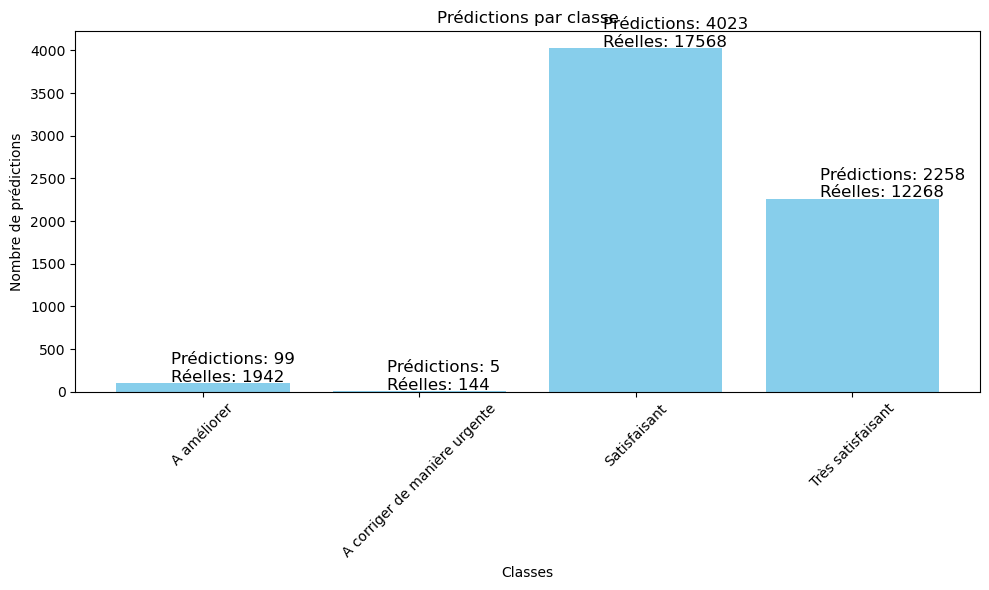

In [10]:
#Comparaison des prédictions avec les valeurs réelles
import matplotlib.pyplot as plt
import numpy as np

unique_classes, counts = np.unique(y_pred_decoded, return_counts=True)

plt.figure(figsize=(10, 6))
bars = plt.bar(unique_classes, counts, color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Nombre de prédictions')
plt.title('Prédictions par classe')
plt.xticks(rotation=45)
plt.tight_layout()

for bar, count, actual_count in zip(bars, counts, np.bincount(data_y_encoded)):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.15, bar.get_height() + 20, f'Prédictions: {count}\nRéelles: {actual_count}', fontsize=12, color='black')

plt.show()

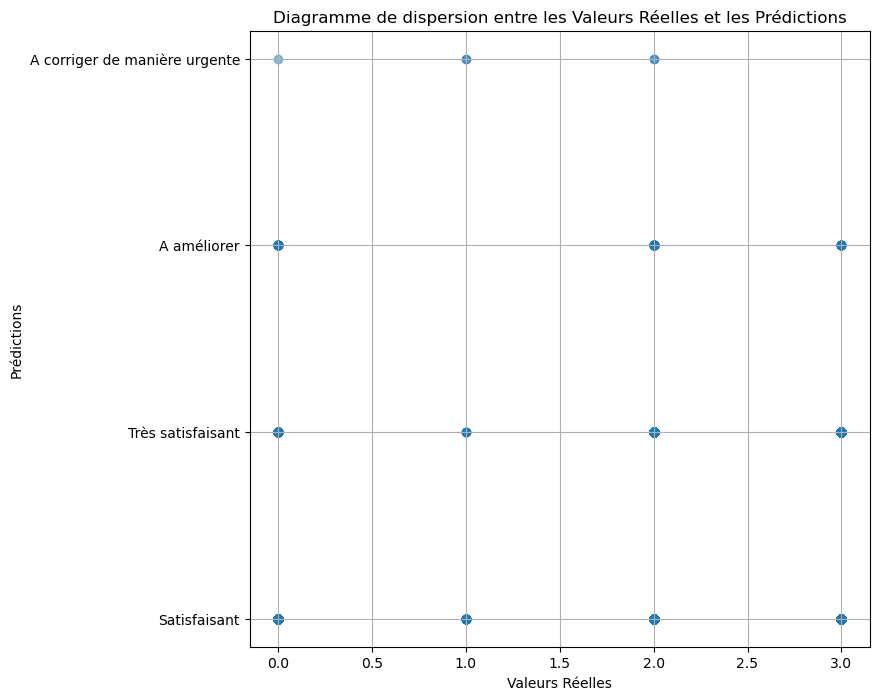

In [6]:
#Scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_decoded, alpha=0.5)
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')
plt.title('Diagramme de dispersion entre les Valeurs Réelles et les Prédictions')
plt.grid(True)
plt.show()

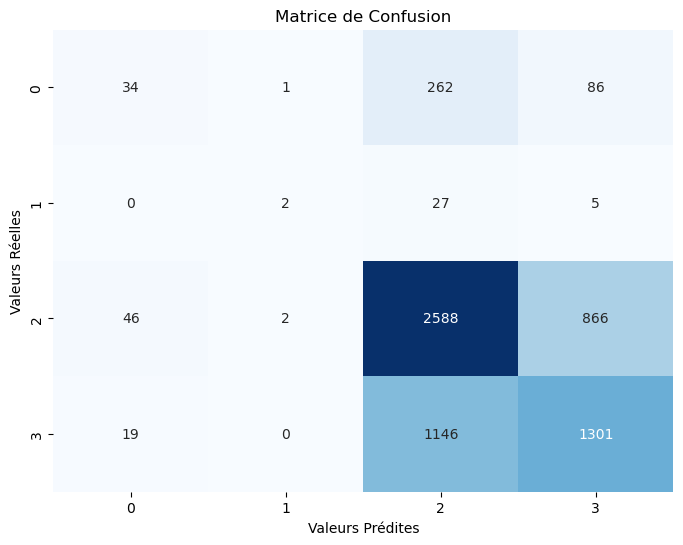

In [7]:
#Matrice de confusion
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Valeurs Prédites')
plt.ylabel('Valeurs Réelles')
plt.title('Matrice de Confusion')
plt.show()